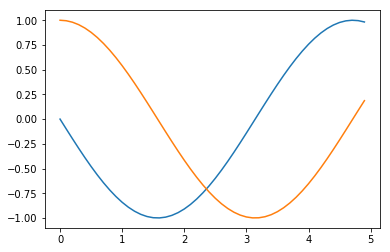

In [3]:
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt

x = np.arange(0, 5, 0.1)


cos = np.cos(x)
sin = -np.sin(x)

plt.plot(x, sin)
plt.plot(x, cos)

In [5]:
import tensorflow as tf

x = tf.Variable(initial_value=3.0)
y = tf.cos(x)

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(y)

with tf.Session() as sess:
    writer = tf.summary.FileWriter('logs', sess.graph)
    writer.close()

In [11]:
from tensorflow.python.framework import ops
from tensorflow.python.ops import array_ops
from tensorflow.python.ops import sparse_ops

@ops.RegisterGradient("ZeroOut")
def _zero_out_grad(op, grad):
    """ The gradient for 'zero out'.
    
    Args:
    op: The 'zero_out' 'Operation' that we are differentiating, which we cann use
    to find the inputs and outputs of the original op.
    grad: Gradient with resspect to the output of the 'zero_out' op.
    
    Returns:
    Gradients with respect to the input of 'zero_out'.
    """
    
    to_zero = op.inputs[0]
    shape = array_ops.shape(to_zero)
    index = array_ops.zeros_like(shape)
    first_grad = array_ops.reshape(grad, [-1])[0]
    to_zero_grad = sparse_ops.sparse_to_dense([index], shape, first_grad, 0)
    return [to_zero_grad] # List of one Tensor, since we have one input

KeyError: "Registering two gradient with name 'ZeroOut' !(Previous registration was in <module> /usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/ipykernel/__main__.py:3)"